# Тема 2. Когортный анализ

### Урок 3. Профиль пользователя. Функции first() и last()

Чтобы проще было делить клиентов на когорты, лучше заранее составить их профили — таблицу с деталями первого посещения каждого пользователя, такими как источник перехода на сайт, страна, устройство.

Для этого вам предстоит:

- изучить две новые функции,
- написать собственную.

#### Функции `first()` и `last()`

В создании профилей вам помогут агрегирующие функции `first()` и `last()`. Первая возвращает первое значение в группе, вторая — последнее.

Для примера загрузим и откроем данные о выпуске по годам и платформам трёх популярных видеоигр — Monopoly, SimCity 2000 и Terraria. Задача: посмотреть, в каком году и на какой платформе впервые вышла каждая игра.

In [1]:
import pandas as pd

games = pd.read_csv('/datasets/three_games.csv')

games

,name,platform,year_of_release
0,Monopoly,PC,1994-01-01
1,SimCity 2000,PC,1992-01-01
2,Monopoly,Wii,2008-01-01
3,Monopoly,PS,1997-01-01
4,SimCity 2000,PS,1996-01-01
5,Terraria,X360,2013-01-01
6,Monopoly,X360,2008-01-01
7,SimCity 2000,SNES,1995-01-01
8,Monopoly,PS2,2008-01-01
9,Terraria,PS3,2013-01-01


Самый ранний год выхода каждой игры получить несложно — достаточно сгруппировать данные по столбцу `'name'` и применить функцию `min()` к значениям `'year_of_release'`:

In [2]:
games.groupby('name').agg({'year_of_release': 'min'})

,year_of_release
name,
Monopoly,1994-01-01
SimCity 2000,1992-01-01
Terraria,2011-01-01


Другое дело — платформы, на которых впервые вышли игры.

Способ с `min()` не годится — результатом будут «наименьшие» строки. Чтобы найти платформы, на которых впервые вышла каждая игра, применим функцию `first()`. При группировке она возвращает не минимальное, а первое значение в каждой группе, поэтому важно заранее отсортировать данные по названию и году выпуска:

In [3]:
games = games.sort_values(by=['name', 'year_of_release'])
games

,name,platform,year_of_release
0,Monopoly,PC,1994-01-01
3,Monopoly,PS,1997-01-01
13,Monopoly,N64,1999-01-01
2,Monopoly,Wii,2008-01-01
6,Monopoly,X360,2008-01-01
8,Monopoly,PS2,2008-01-01
10,Monopoly,PS3,2008-01-01
12,Monopoly,DS,2010-01-01
1,SimCity 2000,PC,1992-01-01
11,SimCity 2000,SAT,1994-01-01


Добавляем `first()`, чтобы узнать первое значение `'platform'` в каждой группе. Благодаря сортировке оно совпадает со значением, соответствующим самой ранней дате:

In [4]:
games.groupby('name').agg({'year_of_release': 'min', 'platform': 'first'})

,year_of_release,platform
name,,
Monopoly,1994-01-01,PC
SimCity 2000,1992-01-01,PC
Terraria,2011-01-01,PC


Функция `min()` определила год первого выхода каждой игры, а `first()` — соответствующую этому году платформу.

У функции `min()` есть зеркальная функция `max()`, которая возвращает не минимальное, а максимальное значение. Такая же «сводная сестра» функции `first()` — функция `last()`. При группировке `last()` возвращает последнее значение в каждой группе:


In [5]:
games.groupby('name').agg(
    {'year_of_release': ['min', 'max'], 'platform': ['first', 'last']}
)

year_of_release             platform      
                         min         max    first  last
name                                                   
Monopoly          1994-01-01  2010-01-01       PC    DS
SimCity 2000      1992-01-01  2003-01-01       PC   GBA
Terraria          2011-01-01  2016-01-01       PC  WiiU

#### Типичный набор данных пользователя

Все системы бизнес-аналитики собирают примерно один и тот же минимальный набор информации о пользователях. Есть две большие группы данных: журнал посещений сайта пользователями, то есть пользовательских сессий, и журнал покупок.

###### Данные журнала пользовательских сессий

- уникальный идентификатор пользователя;
- дата начала сессии;
- дата окончания или длительность сессии;
- устройство, с которого пользователь заходил на сайт;
- географическое положение в момент посещения сайта.

###### Данные журнала покупок

- уникальный идентификатор пользователя,
- дата совершения покупки,
- сумма покупки.

Профили пользователей составляют в три этапа:

1. Загрузить данные журнала посещений.
2. Для каждого пользователя определить дату и время первой сессии.
3. Для каждого пользователя определить соответствующие задаче параметры первой сессии. Например, источник перехода на сайт.

Возьмём датасет с данными пользовательских сессий международного интернет-магазина электронных книг «Читать не вредно»:


In [6]:
sessions = pd.read_csv('/datasets/sessions.csv')
sessions['session_start'] = pd.to_datetime(sessions['session_start'])

sessions

,user_id,region,device,channel,session_duration,session_start
0,94834909438,Germany,iPhone,Yandex,5.417238,2019-05-01 12:59:48
1,142292250445,United States,iPhone,Organic,33.232475,2019-05-01 21:25:00
2,486879489291,United States,Mac,Organic,33.635569,2019-05-01 21:18:40
3,996478278264,Germany,iPhone,Yandex,76.792801,2019-05-01 07:37:52
4,857023407503,United States,Android,Organic,5.976421,2019-05-01 01:35:01
...,...,...,...,...,...,...
282932,507281681954,United States,PC,Organic,6.316422,2019-05-14 06:35:22
282933,584727896171,France,PC,Organic,51.814506,2019-05-14 18:23:01
282934,200769562990,United States,Android,Organic,15.380831,2019-05-14 16:20:10
282935,569449250064,Germany,iPhone,Organic,24.139972,2019-05-14 09:15:01


Содержание столбцов:

- `user_id` — уникальный идентификатор пользователя;
- `region` — географический регион, из которого пользователь зашёл на сайт;
- `device` — устройство, которым воспользовался посетитель;
- `channel` — рекламный канал, из которого пользователь перешёл на сайт;
- `session_duration` — длительность сессии;
- `session_start` — дата и время начала сессии.

Для создания пользовательских профилей с датой первого посещения и источником перехода на сайт напишем функцию `get_profiles()`. В ней сгруппируем значения датафрейма по пользовательскому ID и применим функцию `first()`:


In [7]:
def get_profiles(sessions):

    # сортируем сессии по ID пользователя и дате посещения
    # группируем по ID и находим первые значения session_start и channel
    # столбец с временем первого посещения назовём first_ts
    # от англ. first timestamp — первая временная отметка
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg({'session_start': 'first', 'channel': 'first'})
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    # эти данные понадобятся для когортного анализа
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    return profiles

Вызовем функцию `get_profiles()`, чтобы составить профили пользователей по данным сессий из датафрейма `sessions`:

In [8]:
profiles = get_profiles(sessions)
profiles

,user_id,first_ts,channel,dt,month
0,10964006,2019-05-12 04:50:17,Yandex,2019-05-12,2019-05-01
1,12358165,2019-05-10 23:16:24,Yandex,2019-05-10,2019-05-01
2,12545358,2019-05-05 19:22:46,Organic,2019-05-05,2019-05-01
3,16165560,2019-05-10 20:29:59,Yandex,2019-05-10,2019-05-01
4,17733464,2019-05-12 11:08:25,Organic,2019-05-12,2019-05-01
...,...,...,...,...,...
141414,999939571625,2019-05-08 17:47:00,Yandex,2019-05-08,2019-05-01
141415,999954663782,2019-05-04 09:57:28,AnotherSource,2019-05-04,2019-05-01
141416,999957797889,2019-05-14 21:54:26,Yandex,2019-05-14,2019-05-01
141417,999974288578,2019-05-07 03:42:53,Organic,2019-05-07,2019-05-01


Результат — 141419 пользовательских профилей, в каждом из которых есть данные о дате первого посещения и рекламном источнике, который мотивировал пользователя посетить интернет-магазин. Такие данные значительно упрощают дальнейший анализ. 

Имея готовые профили пользователей, легко узнать количество привлечённых каждым источником посетителей. Достаточно сгруппировать профили по рекламному каналу и посчитать количество уникальных ID функцией `nunique()`:


In [9]:
profiles.groupby('channel').agg({'user_id': 'nunique'})

,user_id
channel,
AnotherSource,24751
Organic,69288
Yandex,47380


Или построить график, отображающий динамику привлечения новых пользователей по каждому из рекламных каналов. Применим метод `plot()`:

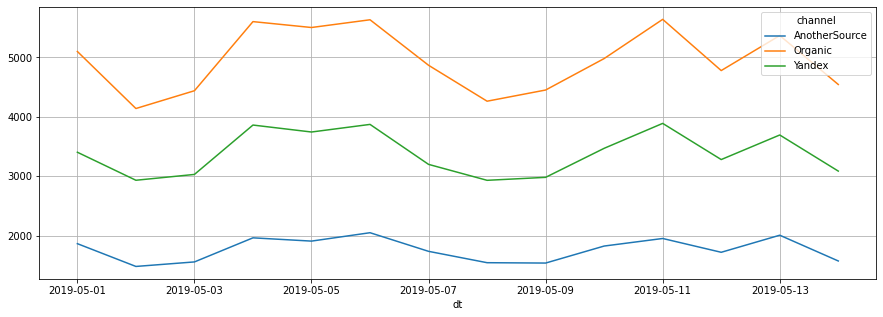

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

profiles.pivot_table(
    index='dt',  # даты первых посещений
    columns='channel',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)

plt.show()

В первые две недели мая новые посетители чаще всего приходили из источника `Organic`, а реже всего — из `AnotherSource`. Все источники отличаются стабильностью: количество привлекаемых ими пользователей не опускается ниже определённого уровня. Например, `Yandex` в исследуемый период привлекал — приблизительно — не менее 3000 новых пользователей в день.